In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📁 Step 2: Load Dataset
# Example: Kaggle or World Bank data
url = 'https://raw.githubusercontent.com/datasets/co2-fossil-global/master/global.csv'
df = pd.read_csv(url)

In [4]:
# 🧹 Step 3: Data Preprocessing
print("Original shape:", df.shape)
df = df.dropna()  # Drop missing values
print("After dropping NA:", df.shape)

Original shape: (260, 8)
After dropping NA: (61, 8)


In [5]:
# Check sample data
df.head()


,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
199,1950,1630,97,423,1070,18,23,0.64
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.68
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69


In [10]:
#Check Available Columns
print("Available columns:\n", df.columns.tolist())


Available columns:
 ['Year', 'Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring', 'Per Capita']


In [32]:
# Select relevant columns
df = df['Year','Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']


KeyError: ('Year', 'Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring')

In [33]:
# Rename for simplicity
df.columns = ['Year','Total_CO2', 'Gas_Fuel', 'Liquid_Fuel', 'Solid_Fuel', 'Cement', 'Gas_Flaring']


In [34]:
# Aggregate by  year
data = df.groupby([ 'Year']).sum().reset_index()

In [35]:
# 📊 Step 4: Feature Selection
features = ['Gas_Fuel', 'Liquid_Fuel', 'Solid_Fuel', 'Cement', 'Gas_Flaring']
target = 'Total_CO2'

X = data[features]
y = data[target]


In [36]:
# 📈 Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:


# 🤖 Step 6: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# 📊 Step 7: Evaluate
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9989969255499094
MAE: 29.02848717948722
MSE: 4034.793879777788


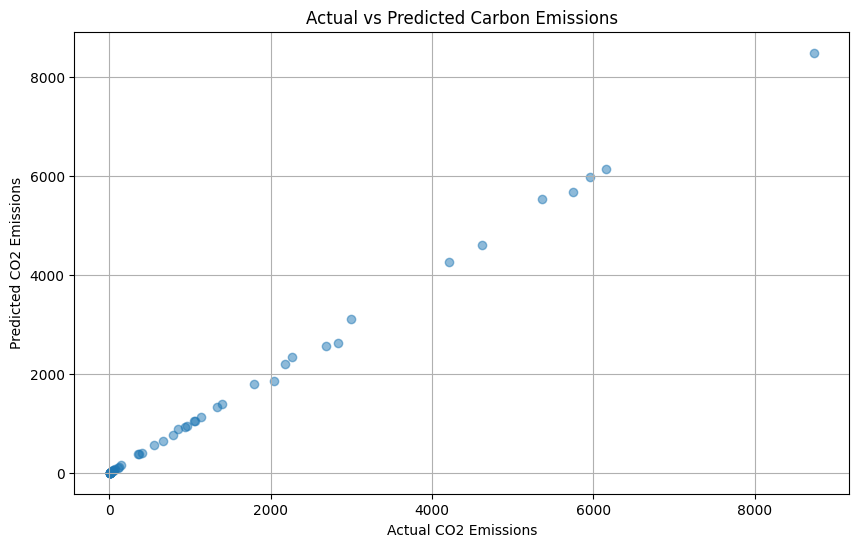

In [39]:
# 📉 Step 8: Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted Carbon Emissions")
plt.grid(True)
plt.show()